# Sistema de reconocimiento de las manchas en la piel utilizando Pattern Recognition

### Importar las librerías
Estas serán las librerías utilizadas para desarrollar el modelo.

### Índice de Librerías:

<div style="text-align: justify"> 
    
1. Tensorflow: TensorFlow es una plataforma de código abierto de extremo a extremo para el aprendizaje automático. Cuenta con un ecosistema integral y flexible de herramientas, bibliotecas y recursos de la comunidad que les permite a los investigadores impulsar un aprendizaje automático innovador y, a los desarrolladores, compilar e implementar con facilidad aplicaciones con tecnología de AA. https://www.tensorflow.org/?hl=es-419
    - Keras: es una biblioteca de redes neuronales escrita en de Python. Ha sido desarrollada principalmente por François Chollet, un ingeniero de Google, y liberada cómo código abierto. Keras es una abstracción, un API High-level, para la creación de modelos de aprendizaje. Aporta una sintaxis homogénea y un interface sencillo, modular y ampliable para la creación de redes neurales. https://www.luisllamas.es/machine-learning-con-tensorflow-y-keras-en-python/#:~:text=TensorFlow%20es%20una%20biblioteca%20desarrollada,9%20de%20noviembre%20del%202015.
      * Layers.Dense: Solo su capa NN regular densamente conectada. Dense implementa la operación: salida = activación (punto (entrada, kernel) + sesgo) donde la activación es la función de activación por elementos que se pasa como argumento de activación, el kernel es una matriz de pesos creada por la capa y el sesgo es un vector de sesgo creado Por capa (solo se aplica si use_bias es True). https://keras.io/api/layers/core_layers/dense/
      * Layers.Dropout: Aplica Dropout a la entrada. La capa de abandono establece aleatoriamente las unidades de entrada en 0 con una frecuencia de velocidad en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1 / (1 - tasa) de modo que la suma de todas las entradas no cambia. https://keras.io/api/layers/regularization_layers/dropout/
      * Optimizers.Adam: Optimizador que implementa el algoritmo de Adam. La optimización de Adam es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de momentos de primer y segundo orden. Según Kingma et al., 2014, el método es 'computacionalmente eficiente, tiene pocos requisitos de memoria, invariante al reajuste diagonal de gradientes y es muy adecuado para problemas que son grandes en términos de datos / parámetros'. https://keras.io/api/optimizers/adam/, https://arxiv.org/abs/1412.6980
      * Metrics.CategoricalCrossentropy: Calcula la frecuencia con la que las predicciones coinciden con las etiquetas one-hot. https://www.tensorflow.org/api_docs/python/tf/keras/metrics/categorical_accuracy
      * Preprocessing.image.ImageDataGenerator: Genere lotes de datos de imágenes de tensores con aumento de datos en tiempo real. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
      * Models.Model: agrupa capas en un objeto con funciones de entrenamiento e inferencia. https://www.tensorflow.org/api_docs/python/tf/keras/Model
      * Callbacks.EarlyStopping: Detenga el entrenamiento cuando una métrica monitoreada haya dejado de mejorar. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
      * Callbacks.ReduceLROPlateau: Reducir la tasa de aprendizaje cuando una métrica ha dejado de mejorar
      * Callbacks.ModelCheckpoint: Devolución de llamada para guardar el modelo Keras o los pesos del modelo con cierta frecuencia. https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint
    2. Random.set_seed: Este método se llama cuando se inicializa RandomState. Se puede volver a llamar para volver a sembrar el generador. RandomState expone una serie de métodos para generar números aleatorios extraídos de una variedad de distribuciones de probabilidad. https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html#numpy.random.RandomState
2. Numpy:Numpy es la librería por excelencia para computación científica en Python. Trae integradas muchas funciones de cálculo matricial de N dimensiones, así como la transformada de Fourier, múltiples funciones de álgebra lineal y varias funciones de aleatoriedad. https://raullg.com/wiki/que-es-numpy/
3. Pandas: es una biblioteca de software escrita como extensión de Numpy para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. https://www.master-data-scientist.com/pandas-herramienta-data-science/
4. Sklearn: es una de estas librerías gratuitas para Python. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy y matplotlib. https://www.master-data-scientist.com/scikit-learn-data-science/
    * Metrics.confusion_matrix: Calcule la matriz de confusión para evaluar la precisión de una clasificación. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    * Model_selection.train_test_split: Dividir matrices o matrices en subconjuntos de pruebas y trenes aleatorios https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
5. Os: This module provides a portable way of using operating system dependent functionality. https://docs.python.org/3/library/os.html
6. Itertools: Este módulo implementa una serie de bloques de construcción de iteradores inspirados en construcciones de APL, Haskell y SML. https://docs.python.org/2/library/itertools.html
7. Matplotlib: Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python. https://pypi.org/project/matplotlib/
</div>

In [1]:
from numpy.random import seed
seed(101) 

import pandas as pd
import numpy as np

import tensorflow
tensorflow.random.set_seed(101)

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy # Agregar referencias

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report # Agregar referencias

import itertools
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns # Agregar referencias

import shutil # Agregar referencias


### Una pequeña exploración de la data que se utilizará:

In [2]:
# Definir un dirección para la localización del dataset.
path = '../input/'
csv_file = '../input/HAM10000_metadata.csv'

# Cargar los datos
df_diseases = pd.read_csv(csv_file).set_index('image_id')
df_diseases.head(5)

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


- Categorías de las diferentes enfermedades.

In [3]:
lesion_type = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [4]:
df_diseases.dx = df_diseases.dx.astype('category', copy = True)
df_diseases['labels'] = df_diseases.dx.cat.codes # Convertir los labels en números.
df_diseases['lesion'] = df_diseases.dx.map(lesion_type)
df_diseases.head()

,lesion_id,dx,dx_type,age,sex,localization,labels,lesion
image_id,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis


- Cantidad de datos por cada categoria

In [5]:
print(df_diseases.lesion.value_counts())

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64


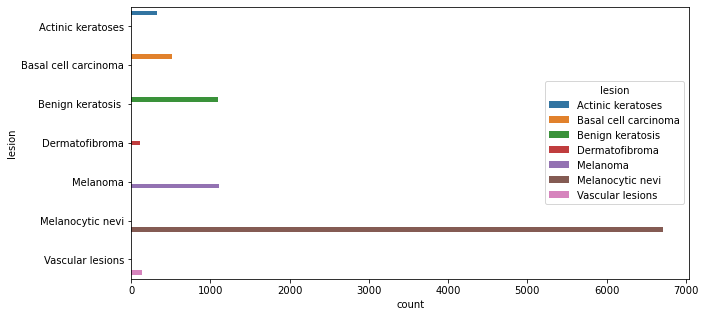

In [6]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y ='lesion',data = df_diseases, hue = "lesion", ax = ax1)

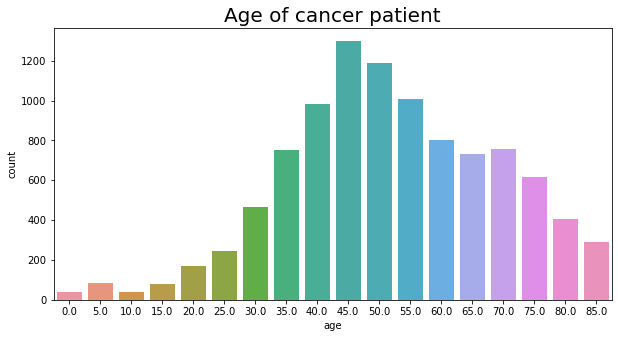

In [7]:
plt.figure(figsize = (10,5))
sns.countplot(df_diseases.age)
plt.title("Age of cancer patient", size = 20)
plt.show()   

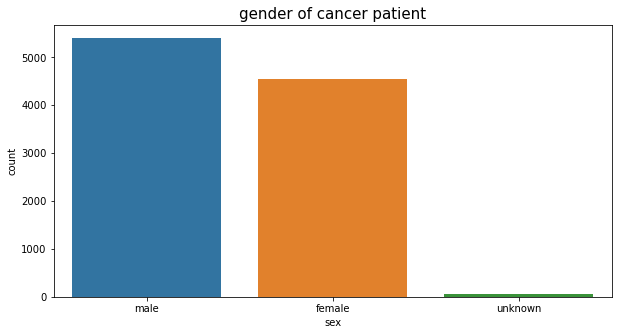

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(df_diseases.sex)
plt.title("gender of cancer patient", size = 15)
plt.show()

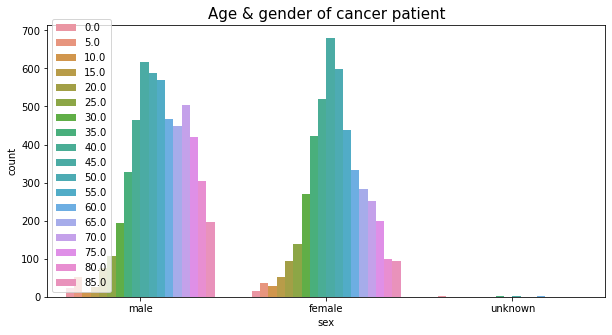

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x ='sex',hue = 'age',data = df_diseases)
plt.legend(loc = 'best')
plt.title("Age & gender of cancer patient",size = 15)
plt.show()

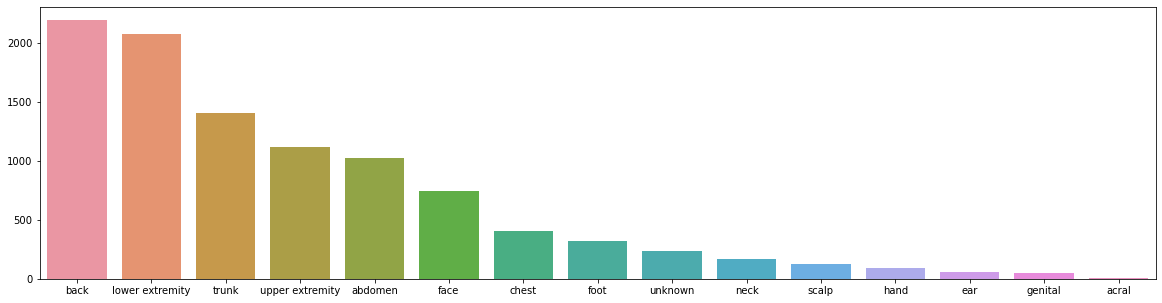

In [10]:
labels = df_diseases.localization.value_counts().index
sizes = df_diseases.localization.value_counts().values
plt.figure(figsize = (20,5))
sns.barplot(x = labels,y = sizes)
plt.show()

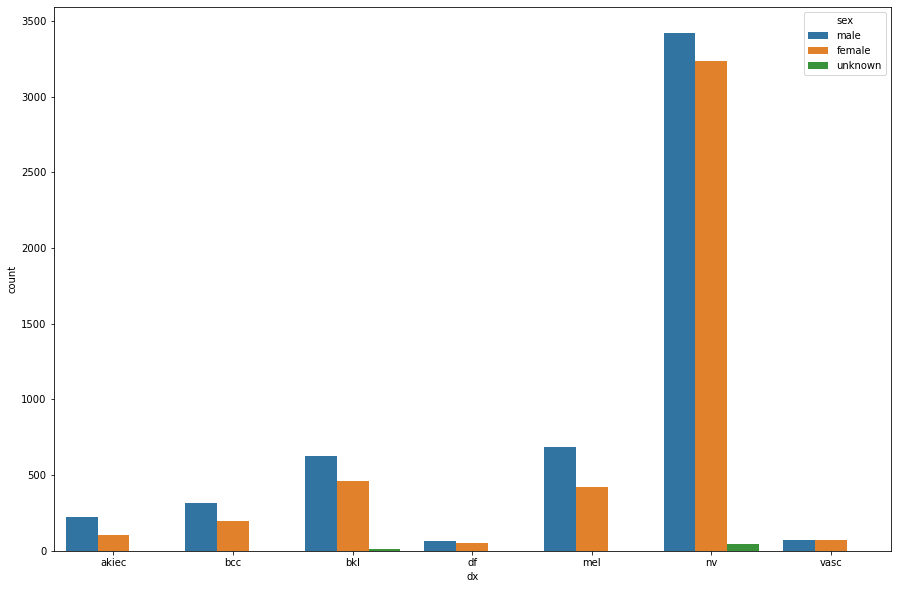

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x="dx",hue="sex",data=df_diseases)
plt.show()

## Construcción del Modelo

**Nota**: En este directorio se encuentran localizados los datos que vamos a utilizar cargados desde Kaggle.

In [12]:
# List the files inside of the folder.
os.listdir('../input')

['ham10000_images_part_1',
 'ham10000_images_part_2',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_28_28_L.csv',
 'HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv']

### Creando una estructura de archivos.
En estas carpetas almacenaran las imagenes que luego serán alimentadas a los generadores de Keras.

In [13]:
# Create a new directory, it is the base dir.
base_dir  = 'base_dir'
os.mkdir(base_dir)

'''We will create two folder inside base dir, Train and Val,'''

# Create train:
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)
# Create val:
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

""" Now we create 7 folders inside each train and val folder"""

# Creating train subdirectories.
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)

mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)

bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)

bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)

akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)

vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)

df = os.path.join(train_dir, 'df')
os.mkdir(df)

# Val_dir val subdirectories.
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)

mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)

bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)

bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)

akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)

vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)

df = os.path.join(val_dir, 'df')
os.mkdir(df)

### Cargar train y Val datasets

In [14]:
df_data = pd.read_csv('../input/HAM10000_metadata.csv')

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


### Limpieza del Dataset.
Se crea un set de datos estratificados para Val.

In [15]:
# We have actually around>
df_data.shape

(10015, 7)

In [16]:
# This tell us how many images are associated with each lesion.
df = df_data.groupby('lesion_id').count()

# Now, we filter out lesion_id's that have only one image associated
df = df[df['image_id'] == 1]

df.reset_index(inplace = True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


Se debe eliminar los duplicados.

In [17]:
# Here we idnetify lesion_id's that have duplicate images and those that have only one image.
def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'

# Create a new colum that is a copy of the lesion_id colunm.
df_data['duplicates'] = df_data['lesion_id']

# Apply the function to this column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


Se puede revisar la cantidad de duplicados existentes usando el siguiente script

In [18]:
df_data['duplicates'].value_counts()


no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

Entonces una vez determinado cuales imágenes están duplicadas vamos a filtrar aquellas que no lo están.

In [19]:
# Filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']
df.shape

(5514, 8)

Ahora creamos un set de datos para val utilizando "df" porque estamos seguros de que no hay duplicados aumentados de estás imágenes en el conjunto de entrenamiento. 

In [20]:
y = df['dx']
_, df_val = train_test_split(df, test_size = 0.17, random_state = 101, stratify = y)

df_val.shape

(938, 8)

Conteo de valores para cada una de las clases definidas.

In [21]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

Creamos un set de datos de entreamiento excluyendo los que se encuentran en Val. Es decir, este sera df_data menos las filas que esten en el dataset de val.

In [22]:
# Function that identifies if an image is part of the train or val set
def identify_val_rows(x):
    # Create a list of all the lesion_id's in the val set.
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'
    
""" Identify train or val rows"""

# First, create a column that is a copy of the image_id column.
df_data['train_or_val'] = df_data['image_id']

# Apply the function to this new column.
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)

# Filter out train rows.
df_train = df_data[df_data['train_or_val'] == 'train']

print(len(df_train))
print(len(df_val))

9077
938


**Nota:** Esto es algo realmente importante de mencionar y es que como se mencionó primeramente el dataset contenía más de 10.000 elementos, sin embargo, después de normalizar y aplicar el clean data hemos obtenido este resultado.

* Ahora se muestra como quedaron las cantidades de datos según cada una de las categorías:

In [23]:
df_train['dx'].value_counts()

nv       5954
mel      1074
bkl      1024
bcc       484
akiec     301
vasc      131
df        109
Name: dx, dtype: int64

In [24]:
df_val['dx'].value_counts()

nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: dx, dtype: int64

### Seleccionar imágenes
Mover las imágenes que realmente vamos a usar a los folders.

In [25]:
# Set the iamge_id as the index in df_data
df_data.set_index('image_id', inplace = True)

In [26]:
# Ge a list of images in each of the two folders.
folder_1 = os.listdir('../input/ham10000_images_part_1')
folder_2 = os.listdir('../input/ham10000_images_part_2')

In [27]:
# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])

In [ ]:
# Transfer the train images
for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('../input/ham10000_images_part_1', fname)
        
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('../input/ham10000_images_part_2', fname)
        
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        
        

In [ ]:
# Transfer the val images
for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join('../input/ham10000_images_part_1', fname)
        
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join('../input/ham10000_images_part_2', fname)
        
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
        

## Data Augmentation
Ahora se realizará una aumentación de la data para poder tener un dataset con un mayor volumen y de esta manera evitar que haya un desequilibrio entre las clases del dataset. Esto se puede comprobar si vemos el siguiente gráfico.

In [ ]:
df_train['dx'].value_counts().plot()

Note que el número de imágenes para la categoria de "nv" es mayor que las demás. Al realizar el entrenamiento esto puede producir un desequilibrio en las predicciones teniendo preferencias sobre una categoria. Para equilibrar esto realizaremos varias aumentaciones a las imágene de las otras categorias.

* Check how many train images we have in each folder.

In [ ]:
# Check
print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

* Check how many val images have in each folder.

In [ ]:
print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

In [ ]:
# Note that we are not augmenting class 'nv'. 
class_list = ['mel','bkl','bcc','akiec','vasc','df']

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later.
    # Create a base dir.
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)\
    
    # Create a dir within the base dir to store images of the same class.
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class.
    img_class = item

    # List all images in that directory.
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'.
    for fname in img_list:
            # Source path to image.
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            
            # Destination path to image.
            dst = os.path.join(img_dir, fname)
            
            # Copy the image from the source to the destination.
            shutil.copyfile(src, dst)


    # Point to a dir containing the images and not to the images themselves.
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        # brightness_range=(0.9,1.1), // It could be another kind of augmentation.
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)



    # Generate the augmented images and add them to the training folders  
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # Run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # Delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

### Visualización de algunas de las imágenes generadas

In [ ]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None)

**Note**: hasta ahora hemos estado preparando los datos para poder comenzar la construcción del modelo, normalizamos la información, limpiamos el conjunto de datos y evitamos que se produjera el desequlibrio del dataset. Así que es hora de construir el modelo.

## Construcción del Modelo.

### Configurar los generadores

In [ ]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
datagen = ImageDataGenerator(
    preprocessing_function= \
    tensorflow.keras.applications.mobilenet.preprocess_input)

train_batches = datagen.flow_from_directory(train_path,target_size = (image_size,image_size), batch_size=train_batch_size)

valid_batches = datagen.flow_from_directory(valid_path,target_size=(image_size,image_size), batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(valid_path, target_size=(image_size,image_size), batch_size=1,shuffle=False)

### Construir el modelo a partir del modelo MobileNet
* Descargamos el modelo pre entrenado

In [ ]:
mobile = tensorflow.keras.applications.mobilenet.MobileNet()

* Visualizamos la información del modelo

In [ ]:
mobile.summary()

* Número de layer del modelo.

In [ ]:
len(mobile.layers)

### Crear la arquitectura del modelo.

In [ ]:
# Exclude the last 5 layers of the above model.
# This will include all layers up to and including global_average_pooling2d_1
x = mobile.layers[-6].output

In [ ]:
# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
predictions = Dense(7, activation='softmax')(x)

In [ ]:
# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=mobile.input, outputs=predictions)

In [ ]:
# Visualization the new model settings.
model.summary()

* Ahora tenemos que escoger cuantos de layers actualmente queremos que sean entrenados.

In [ ]:
# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

### Entrenar el modelo.

In [ ]:
# Define Top2 and Top3 Accuracy
def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [ ]:
# Compile the model
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=[categorical_accuracy, top_2_accuracy, top_3_accuracy])

In [ ]:
# Get the labels that are associated with each index
print(valid_batches.class_indices)

**Nota:** Como se pudo ver al inicio es más frecuente que se encuentren casos de melanoma que de las otras enfermedades en la piel. Esta es la razón por la cual agregaremos peso a cada categoría para hacer al modelo más sensible a detectar casos de melanoma.

In [ ]:
# Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [ ]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_top_3_accuracy', verbose=1, 
                             save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_top_3_accuracy', factor=0.5, patience=2, 
                                   verbose=1, mode='max', min_lr=0.00001)
                              


In [ ]:
callbacks_list = [checkpoint, reduce_lr]

In [ ]:
history = model.fit_generator(train_batches, steps_per_epoch=train_steps, 
                              class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=30, verbose=1,
                   callbacks=callbacks_list)

### Comprobar resultados del entrenamiento

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

In [ ]:
# Here the the last epoch will be used.
val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

In [ ]:
print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

In [ ]:
# Here the best epoch will be used.
model.load_weights('model.h5')

val_loss, val_cat_acc, val_top_2_acc, val_top_3_acc = \
model.evaluate_generator(test_batches, 
                        steps=len(df_val))

In [ ]:
print('val_loss:', val_loss)
print('val_cat_acc:', val_cat_acc)
print('val_top_2_acc:', val_top_2_acc)
print('val_top_3_acc:', val_top_3_acc)

### Monitoreo de entrenamiento: curvas de aprendizaje

In [ ]:
# display the loss and accuracy curves
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
train_top2_acc = history.history['top_2_accuracy']
val_top2_acc = history.history['val_top_2_accuracy']
train_top3_acc = history.history['top_3_accuracy']
val_top3_acc = history.history['val_top_3_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training cat acc')
plt.plot(epochs, val_acc, 'b', label='Validation cat acc')
plt.title('Training and validation cat accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_top2_acc, 'bo', label='Training top2 acc')
plt.plot(epochs, val_top2_acc, 'b', label='Validation top2 acc')
plt.title('Training and validation top2 accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, train_top3_acc, 'bo', label='Training top3 acc')
plt.plot(epochs, val_top3_acc, 'b', label='Validation top3 acc')
plt.title('Training and validation top3 accuracy')
plt.legend()


plt.show()

### Visualización de la matriz de confución
En el campo de la inteligencia artificial  y el aprendizaje automático una matriz de confusión es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos. https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

In [ ]:
# Get the labels of the test images.

test_labels = test_batches.classes

In [ ]:
# Print the label associated with each class
test_batches.class_indices

In [ ]:
# make a prediction
predictions = model.predict_generator(test_batches, steps=len(df_val), verbose=1)

In [ ]:
predictions.shape

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
# argmax returns the index of the max value in a row
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

In [ ]:
# Define the labels of the class indices. These need to match the 
# order shown above.
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

## Generar un reporte de clasisficación

In [ ]:
# Get the index of the class with the highest probability score
y_pred = np.argmax(predictions, axis=1)

# Get the labels of the test images.
y_true = test_batches.classes

In [ ]:
# Generate a classification report
report = classification_report(y_true, y_pred, target_names=cm_plot_labels)

print(report)

* Recall = Dada una clase, ¿el clasificador podrá detectarla?
* Precisión = Dada una predicción de clase de un clasificador, ¿qué tan probable es que sea correcta?
* Puntuación F1 = La media armónica del recuerdo y la precisión. Esencialmente, castiga los valores extremos.

In [ ]:
os.mkdir('model')

In [ ]:
!tensorflowjs_converter --input_format keras model.h5 model

In [ ]:
import tensorflowjs as tfjs

# os.mkdir('model')
tfjs.converters.save_keras_model(model, 'model')

In [ ]:
shutil.rmtree('model')